In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,f1_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb

import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 3.4/150.0 MB 20.2 MB/s eta 0:00:08
   - -------------------------------------- 7.3/150.0 MB 18.1 MB/s eta 0:00:08
   --- ------------------------------------ 12.3/150.0 MB 19.8 MB/s eta 0:00:07
   ---- ----------------------------------- 16.5/150.0 MB 20.4 MB/s eta 0:00:07
   ----- ---------------------------------- 21.0/150.0 MB 20.4 MB/s eta 0:00:07
   ------ --------------------------------- 25.4/150.0 MB 20.6 MB/s eta 0:00:07
   -------- ------------------------------- 30.1/150.0 MB 20.8 MB/s eta 0:00:06
   --------- ------------------------------ 34.1/150.0 MB 20.6 MB/s eta 0:00:06
   ---------- ----------------------------- 37.7/150.0 MB 20.3 MB/s eta 0:00:06
   ----------- ---------------------------- 42.7/150.0 MB 20.6 MB/s eta 0:00:06
   ------------ --------------------------- 47.4/150.0 MB 20.5 MB/s eta 0:00:05
   ------------- -------------------------- 51.6/15

In [11]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [15]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [17]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [21]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

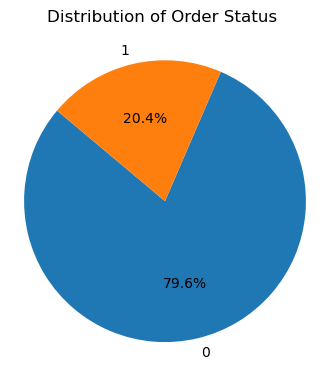

In [23]:
plt.figure(figsize=(4,4))
output_counts = df['Exited'].value_counts()
plt.pie(output_counts, labels=output_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Distribution of Order Status \n')
plt.ylabel('')

plt.show()

Box plot for numerical features:


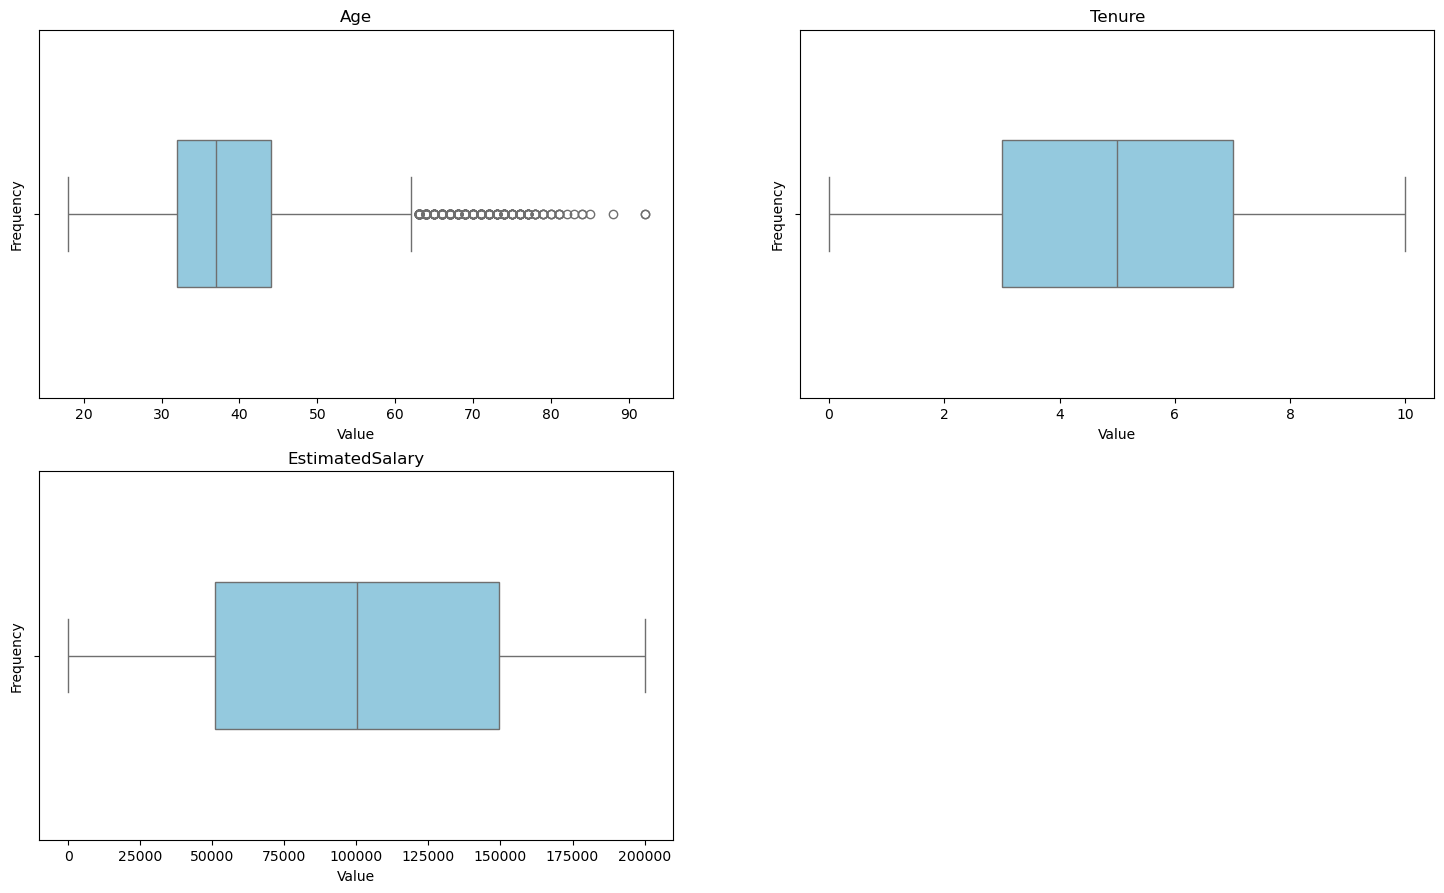

In [25]:
print("Box plot for numerical features:")
plt.figure(figsize=(18,22))
numeric_features = ['Age','Tenure','EstimatedSalary']
for i, column in enumerate(numeric_features):
    plt.subplot(4,2, i + 1)
    sns.boxplot(x=df[column], color='skyblue', width=0.4)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

Count plot for categorical features:


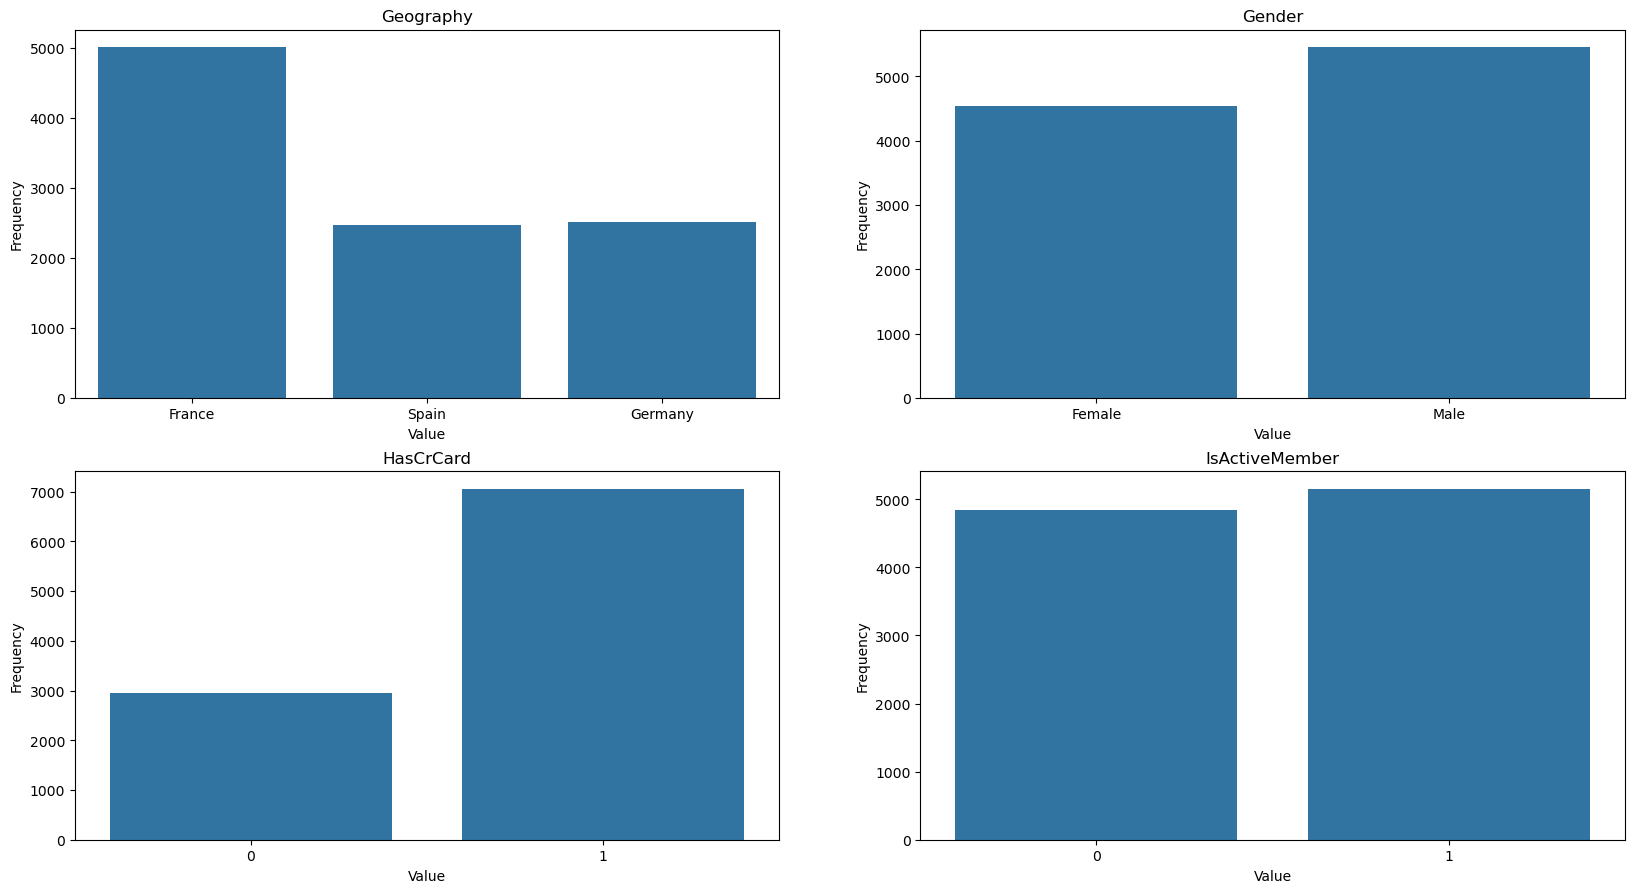

In [27]:
print("Count plot for categorical features:")
plt.figure(figsize=(20,22))

for i, column in enumerate(['Geography','Gender','HasCrCard','IsActiveMember']):
    plt.subplot(4,2,i + 1)
    sns.countplot(x= df[column], data=df)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

Observing independent variables based on the Exited Column:


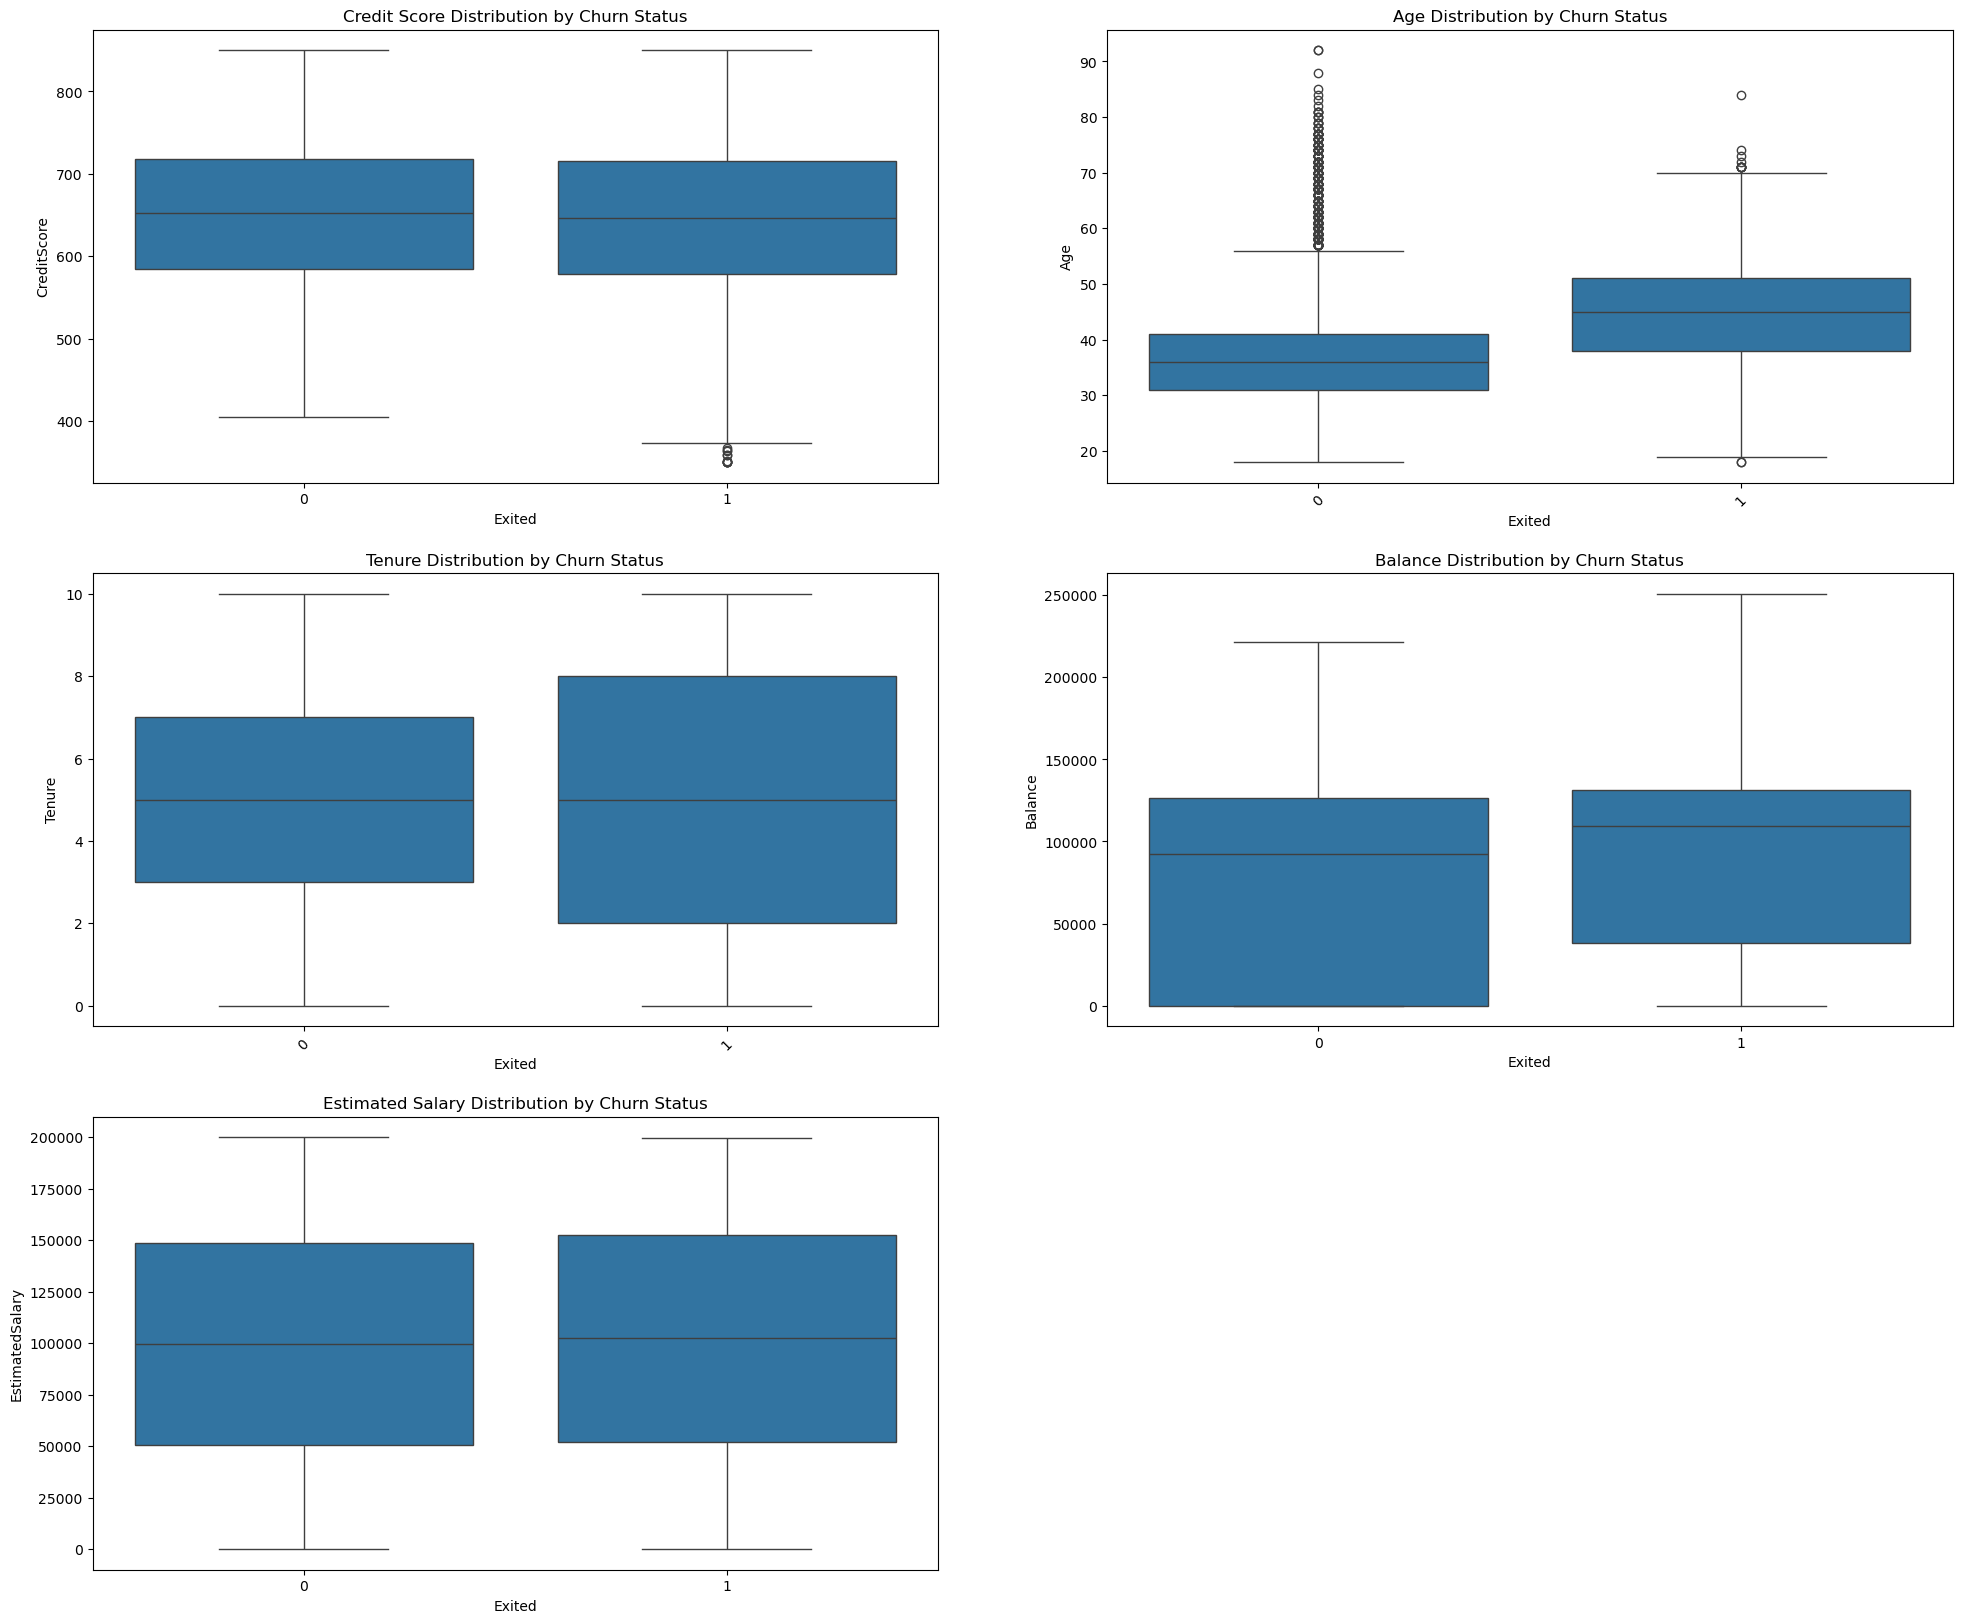

In [29]:
print("Observing independent variables based on the Exited Column:")

fig, axes = plt.subplots(3,2, figsize=(24,20))

sns.boxplot(data=df, y='CreditScore', x ='Exited',  ax=axes[0,0])
axes[0,0].set_title('Credit Score Distribution by Churn Status')

sns.boxplot(data=df, y='Age', x ='Exited', ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Churn Status')
axes[0,1].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, y='Tenure', x ='Exited', ax=axes[1,0])
axes[1,0].set_title('Tenure Distribution by Churn Status')
axes[1,0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, y='Balance', x ='Exited', ax=axes[1,1])
axes[1,1].set_title('Balance Distribution by Churn Status')

sns.boxplot(data=df, y='EstimatedSalary', x= 'Exited', ax=axes[2,0])
axes[2,0].set_title('Estimated Salary Distribution by Churn Status')

axes[2,1].axis('off')
plt.show()

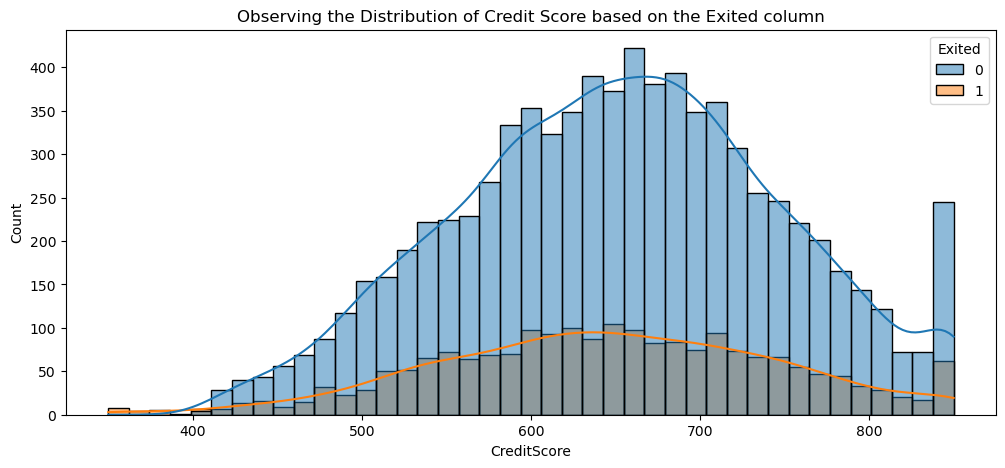

In [31]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='CreditScore', hue='Exited', kde=True)
plt.title('Observing the Distribution of Credit Score based on the Exited column')
plt.show()

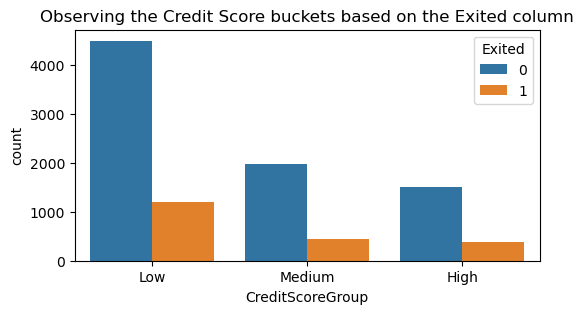

In [33]:
bins = [0,669,739,850]
labels = ['Low','Medium','High']

df['CreditScoreGroup'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(6,3))
sns.countplot(x = 'CreditScoreGroup', hue = 'Exited', data = df)
plt.title('Observing the Credit Score buckets based on the Exited column')
plt.show()

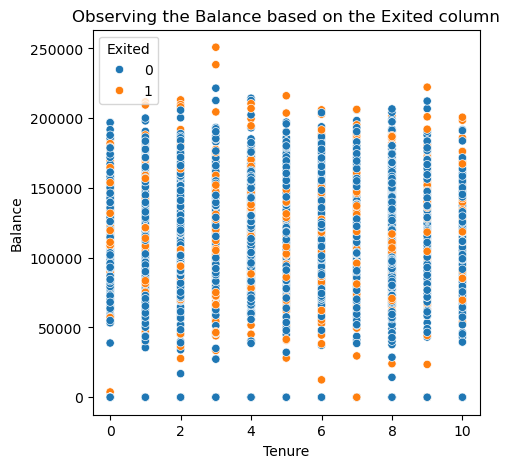

In [35]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Tenure', y='Balance', hue='Exited', data=df)
plt.title('Observing the Balance based on the Exited column')
plt.show()

In [41]:
cat_col = ['Geography','Gender','CreditScoreGroup']

print("Observing the categorical column disribution before encoding: \n")
for columns in cat_col:
    print(columns, '\n')
    print(df[columns].value_counts(),'\n')

Observing the categorical column disribution before encoding: 

Geography 

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64 

Gender 

Gender
Male      5457
Female    4543
Name: count, dtype: int64 

CreditScoreGroup 

CreditScoreGroup
Low       5693
Medium    2428
High      1879
Name: count, dtype: int64 



In [43]:
encoder = LabelEncoder()

for columns in cat_col:
    df[columns] = encoder.fit_transform(df[columns])

print("Observing the categorical column disribution after encoding: \n")    
for columns in cat_col:
    print(columns, '\n')
    print(df[columns].value_counts(),'\n')

Observing the categorical column disribution after encoding: 

Geography 

Geography
0    5014
1    2509
2    2477
Name: count, dtype: int64 

Gender 

Gender
1    5457
0    4543
Name: count, dtype: int64 

CreditScoreGroup 

CreditScoreGroup
1    5693
2    2428
0    1879
Name: count, dtype: int64 



In [45]:
col_drop = ['Exited','RowNumber','CustomerId','Surname']
X = df.drop(col_drop, axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaling_columns = ['Age','CreditScore','Balance','EstimatedSalary','CreditUtilization','BalanceToSalaryRatio','CreditScoreAgeInteraction']

scaler = StandardScaler()
scaler.fit(X_train[scaling_columns])

X_train[scaling_columns] = scaler.transform(X_train[scaling_columns])
X_test[scaling_columns] = scaler.transform(X_test[scaling_columns])

In [47]:
print("Training dataset shape:", X_train.shape, y_train.shape)
print("Test dataset shape:",X_test.shape, y_test.shape)

Training dataset shape: (7000, 15) (7000,)
Test dataset shape: (3000, 15) (3000,)


In [53]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'K-Nearest Neighbors': make_pipeline_imb(SMOTE(random_state=42), KNeighborsClassifier()),
    'Support Vector Machine': make_pipeline_imb(SMOTE(random_state=42), SVC(probability=True, random_state=42)),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train), random_state=42),
    'Gradient Boosting': make_pipeline_imb(SMOTE(random_state=42), GradientBoostingClassifier(random_state=42))
}

# Instead of starting with an empty dataframe, create an empty list first
results_list = []

lb = LabelBinarizer()
lb.fit(y_train)

for name, model in models.items():
    print(f"Model: {name}")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred),'\n')
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred),'\n')
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score: {accuracy} \n")
    
    recall = recall_score(y_test, y_pred, pos_label=1)
    print(f"Recall Score: {recall}")

    f1 = f1_score(lb.transform(y_test), lb.transform(y_pred), pos_label=1)
    print(f"F1 Score: {f1}")
    
    if hasattr(model, "predict_proba"):
        roc_auc = roc_auc_score(lb.transform(y_test), model.predict_proba(X_test)[:, 1])
        print(f"ROC AUC Score: {roc_auc}")
    else:
        roc_auc = None
    
    # Append the results to the list instead of using DataFrame.append
    results_list.append({
        'Model': name, 
        'Accuracy': accuracy, 
        'Recall Score': recall, 
        'F1 Score': f1, 
        'ROC AUC Score': roc_auc
    })
    
    print("-" * 50,'\n')

# After the loop ends, convert the list into a DataFrame
results_df = pd.DataFrame(results_list)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      2416
           1       0.36      0.68      0.47       584

    accuracy                           0.70      3000
   macro avg       0.63      0.70      0.63      3000
weighted avg       0.80      0.70      0.73      3000
 

Confusion Matrix:
[[1712  704]
 [ 185  399]] 

Accuracy Score: 0.7036666666666667 

Recall Score: 0.6832191780821918
F1 Score: 0.4730290456431535
ROC AUC Score: 0.7640820613716774
-------------------------------------------------- 

Model: Random Forest
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2416
           1       0.79      0.42      0.55       584

    accuracy                           0.87      3000
   macro avg       0.83      0.70      0.74      3000
weighted avg       0.86      0.87      0.85      3000
 

Confusion Matrix:
[[2352   64]
 [ 337  247]] 

Accuracy Score

In [55]:
results_df

,Model,Accuracy,Recall Score,F1 Score,ROC AUC Score
0,Logistic Regression,0.703667,0.683219,0.473029,0.764082
1,Random Forest,0.866333,0.422945,0.551955,0.854414
2,K-Nearest Neighbors,0.752333,0.667808,0.512147,0.776639
3,Support Vector Machine,0.785667,0.662671,0.546224,0.822500
4,XGBoost,0.833000,0.609589,0.586974,0.841784
5,Gradient Boosting,0.817000,0.700342,0.598391,0.859767
